In [2]:
import requests
import json

# Let's get the data from the Citibike API
url = 'http://www.citibikenyc.com/stations/json'
resp = requests.get(url)
results = json.loads(resp.text)

data = results["stationBeanList"]
data

[{u'altitude': u'',
  u'availableBikes': 1,
  u'availableDocks': 38,
  u'city': u'',
  u'id': 72,
  u'landMark': u'',
  u'lastCommunicationTime': u'2016-05-25 05:08:43 PM',
  u'latitude': 40.76727216,
  u'location': u'',
  u'longitude': -73.99392888,
  u'postalCode': u'',
  u'stAddress1': u'W 52 St & 11 Ave',
  u'stAddress2': u'',
  u'stationName': u'W 52 St & 11 Ave',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 39},
 {u'altitude': u'',
  u'availableBikes': 28,
  u'availableDocks': 4,
  u'city': u'',
  u'id': 79,
  u'landMark': u'',
  u'lastCommunicationTime': u'2016-05-25 05:11:08 PM',
  u'latitude': 40.71911552,
  u'location': u'',
  u'longitude': -74.00666661,
  u'postalCode': u'',
  u'stAddress1': u'Franklin St & W Broadway',
  u'stAddress2': u'',
  u'stationName': u'Franklin St & W Broadway',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 33},
 {u'altitude': u'',
  u'availableBikes': 7

In [3]:
resp = requests.get(url)

# We transform the returned JSON answer from the API into a Python dictionary object
results = json.loads(resp.text)

# We only need a subset of the data in the JSON returned by the Citibike API, so we keep only we need
data = results["stationBeanList"]



In [4]:
import pandas
df = pandas.DataFrame(data)
df

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,1,38,,72,,2016-05-25 05:08:43 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,28,4,,79,,2016-05-25 05:11:08 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,7,19,,82,,2016-05-25 05:07:39 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,23,38,,83,,2016-05-25 05:11:05 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,0,37,,116,,2016-05-25 05:10:42 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39
5,,8,10,,119,,2016-05-25 05:10:15 PM,40.696089,,-73.978034,,Park Ave & St Edwards St,,Park Ave & St Edwards St,1,In Service,False,19
6,,7,12,,120,,2016-05-25 05:07:51 PM,40.686768,,-73.959282,,Lexington Ave & Classon Ave,,Lexington Ave & Classon Ave,1,In Service,False,19
7,,2,25,,127,,2016-05-25 05:10:32 PM,40.731724,,-74.006744,,Barrow St & Hudson St,,Barrow St & Hudson St,1,In Service,False,31
8,,25,3,,128,,2016-05-25 05:10:18 PM,40.727103,,-74.002971,,MacDougal St & Prince St,,MacDougal St & Prince St,1,In Service,False,30
9,,20,24,,137,,2016-05-25 05:11:07 PM,40.761628,,-73.972924,,E 56 St & Madison Ave,,E 56 St & Madison Ave,1,In Service,False,46


In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib as plt

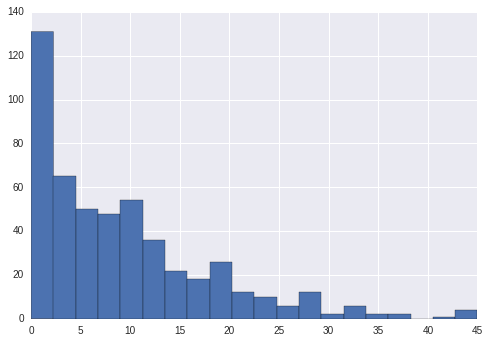

In [7]:
df["availableBikes"].hist(bins=20)

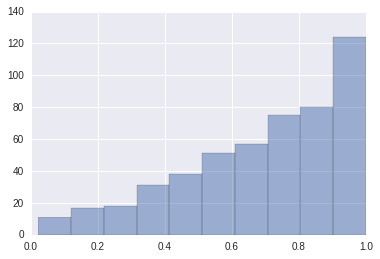

In [9]:
%matplotlib inline
#
(df["availableDocks"]/df['totalDocks']).hist(alpha=0.5)
#df["totalDocks"].hist(alpha=0.5)

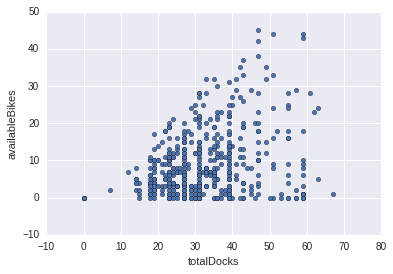

In [10]:
df.plot(kind='scatter', x="totalDocks", y="availableBikes")

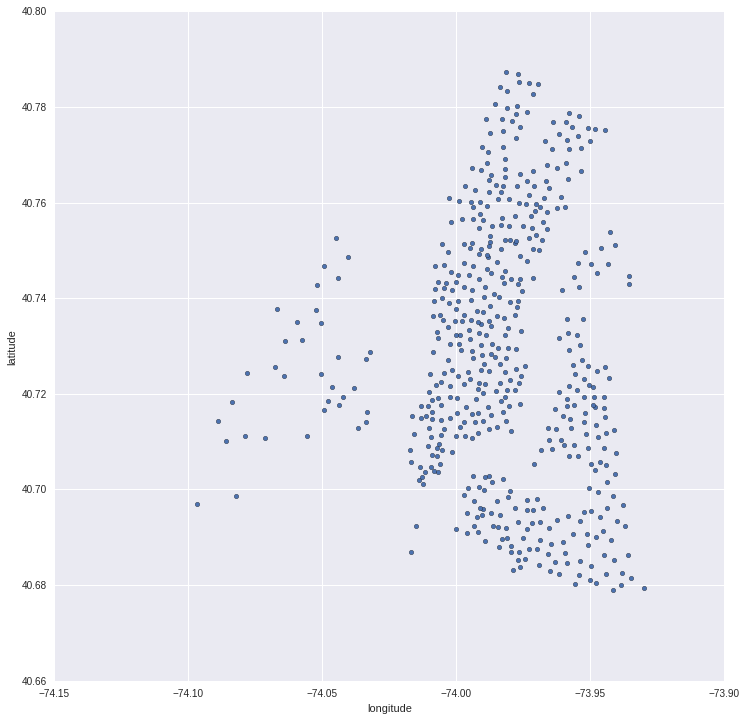

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib as plt

# This defines the size of the image below
plt.rcParams['figure.figsize'] = (12, 12)

# Let's do a first plot. Put the stations on a scatterplot based on
# their longitude and latitude
df.plot(kind='scatter', x='longitude', y='latitude')

In [14]:
df[df["longitude"] == 0]
df.drop(503, inplace=True)

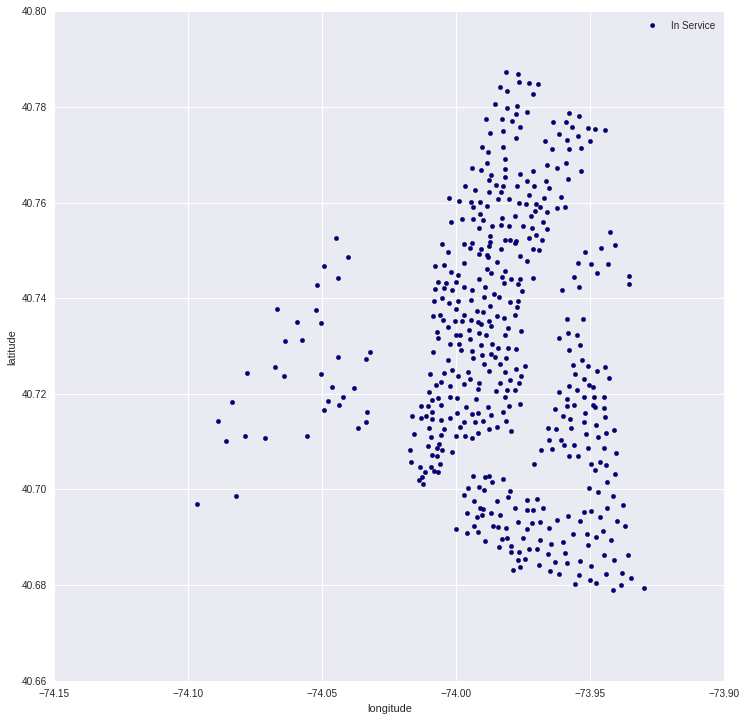

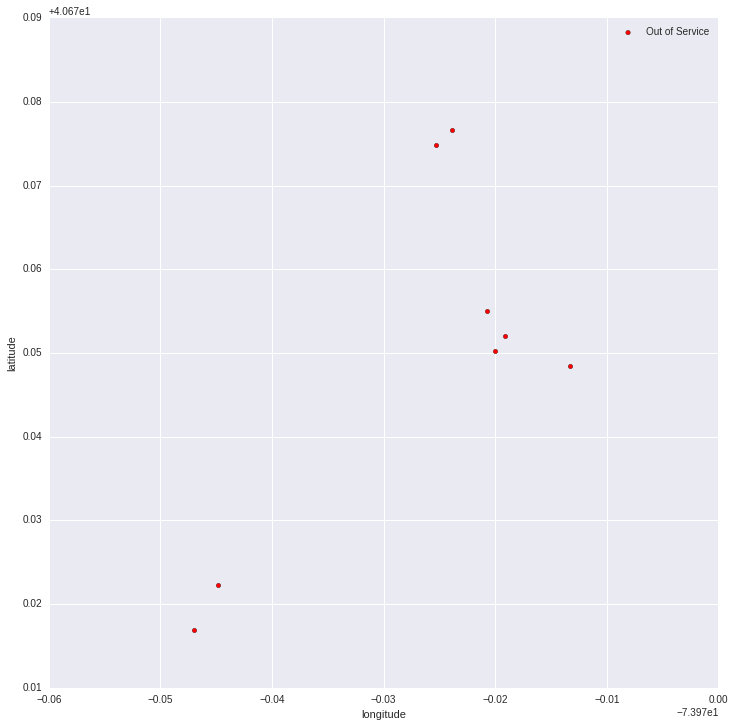

In [16]:
# Lets plot the stations that are out of service in red
inservice = (df["statusValue"] == 'In Service')
outofservice = (df["statusValue"] == 'Not In Service')

df[inservice].plot(kind='scatter', 
                   x='longitude', 
                   y='latitude', 
                   color='DarkBlue', 
                   label='In Service')

df[outofservice].plot(kind='scatter', 
                      x='longitude', 
                      y='latitude', 
                      color='Red', 
                      label = 'Out of Service')

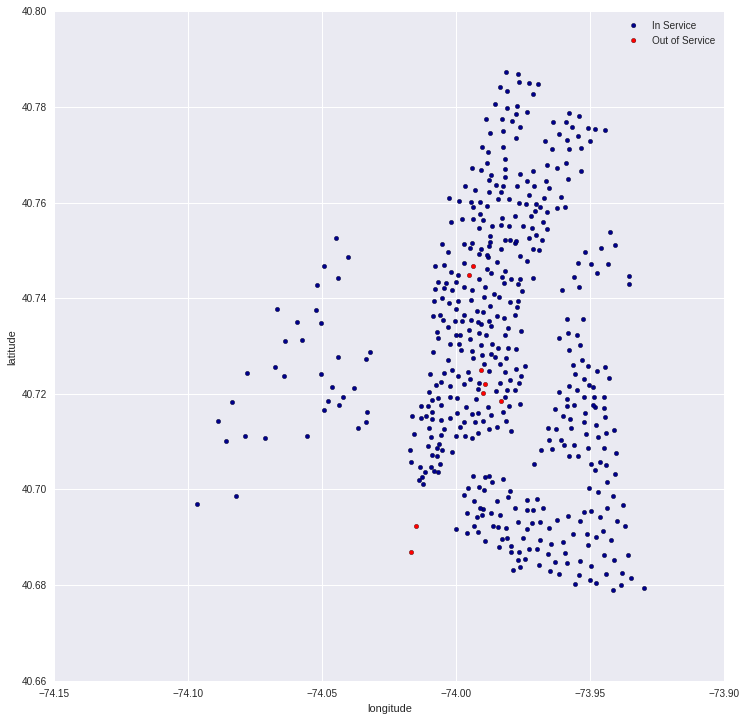

In [17]:
# I do not like having to separate plots for that. There should be a way to merge the two plots
# After checking the online documentation, it seem that we will use the "ax" convention
inservice = (df["statusValue"] == 'In Service')
outofservice = (df["statusValue"] == 'Not In Service')

firstplot = df[inservice].plot(kind='scatter', 
                               x='longitude', 
                               y='latitude', 
                               color='DarkBlue', 
                               label='In Service')

secondplot = df[outofservice].plot(kind='scatter', 
                      x='longitude', 
                      y='latitude', 
                      color='Red', 
                      label = 'Out of Service', 
                      ax = firstplot)


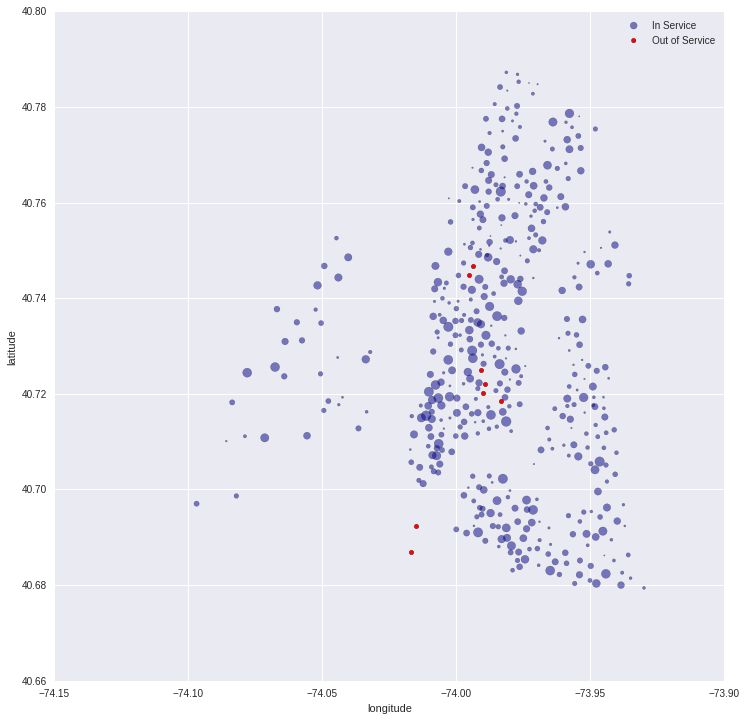

In [18]:
# And now make the size of each point proportional to the size of available bikes
# using the s option in the plot
inservice = (df["statusValue"] == 'In Service')
outofservice = (df["statusValue"] == 'Not In Service')

# We also add the "alpha=0.5" to add transparency
firstplot = df[inservice].plot(kind='scatter', 
                               x='longitude', 
                               y='latitude', 
                               color='DarkBlue', 
                               alpha=0.5, 
                               label='In Service', 
                               s=100*(df['availableBikes']/df['totalDocks']))

secondplot = df[outofservice].plot(kind='scatter', 
                                   x='longitude', 
                                   y='latitude', 
                                   color='Red', 
                                   ax = firstplot, 
                                   label = 'Out of Service')
